From our previous session, we saw how to categorize a dataset and apply different funtions for handling data in an efficient manner. In a workflow aggregation and transformation is a critical componenet for data analysis. groupby is also an example of such procedures. 

The populatrity of relational databases and SQL is the ease at which the data can be joined or transformed and aggregated. 

In this learning session, we will be learning how to:

• Split a pandas object into pieces using one or more keys (in the form of functions, arrays, or DataFrame column names)

• Calculate group summary statistics, like count, mean, or standard deviation, or auser-defined function

• Apply within-group transformations or other manipulations, like normalization, linear regression, rank, or subset selection

• Compute pivot tables and cross-tabulations

• Perform quantile analysis and other statistical group analyses

## Group by
To understand groupby you can see the below illustration
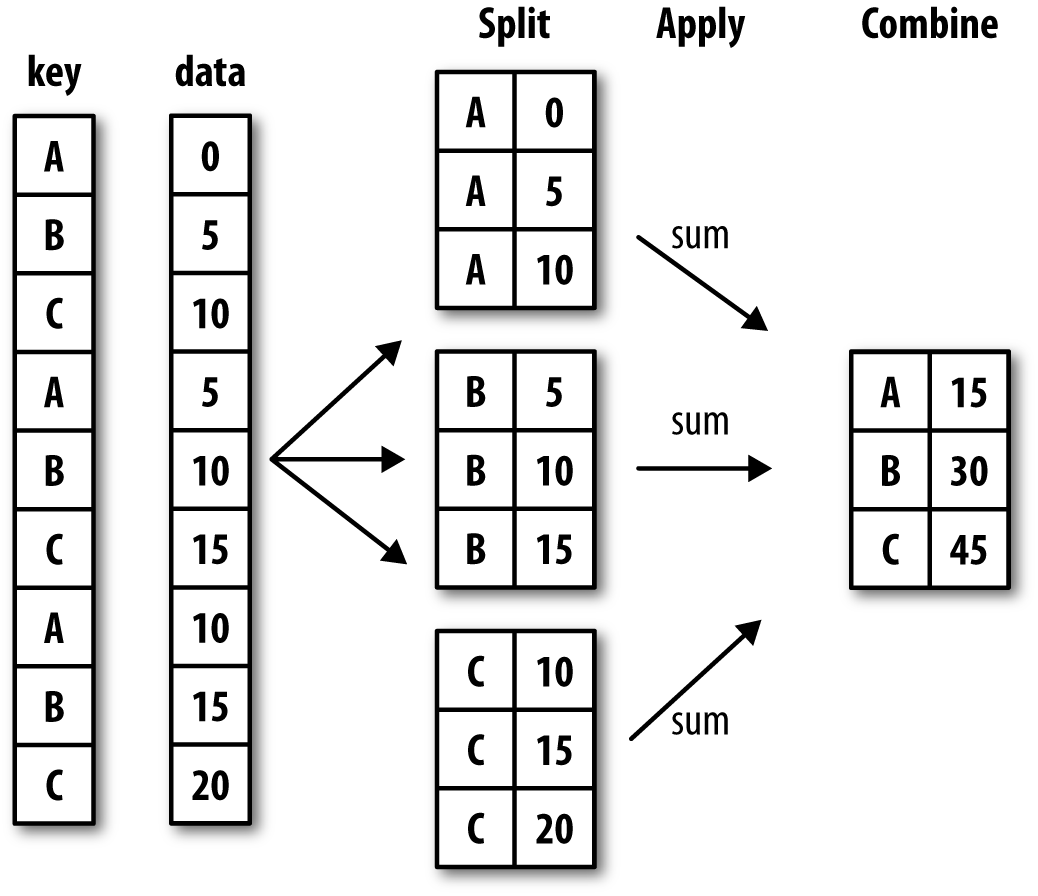

In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),'data2' : np.random.randn(5)})

In [2]:
df

,key1,key2,data1,data2
0,a,one,-0.520734,1.578359
1,a,two,0.977059,1.166925
2,b,one,0.537765,1.290219
3,b,two,-0.650597,0.236575
4,a,one,-0.287751,-0.655521


In [3]:
grouped = df['data1'].groupby(df['key1'])

In [4]:
grouped

In [5]:
grouped.mean()

key1
a    0.056191
b   -0.056416
Name: data1, dtype: float64

In [6]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()

In [7]:
means.unstack()

key2,one,two
key1,,
a,-0.404243,0.977059
b,0.537765,-0.650597


In [8]:
# Group by for categorical values
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])

In [9]:
years = np.array([2005, 2005, 2006, 2005, 2006])

In [10]:
df['data1'].groupby([states, years]).mean()

California  2005    0.977059
            2006    0.537765
Ohio        2005   -0.585666
            2006   -0.287751
Name: data1, dtype: float64

In [11]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.056191,0.696588
b,-0.056416,0.763397


In [12]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one  -0.404243  0.461419
     two   0.977059  1.166925
b    one   0.537765  1.290219
     two  -0.650597  0.236575

In [13]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [14]:
# Interating Over Groups
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one -0.520734  1.578359
1    a  two  0.977059  1.166925
4    a  one -0.287751 -0.655521
b
  key1 key2     data1     data2
2    b  one  0.537765  1.290219
3    b  two -0.650597  0.236575


In [15]:
for name, group in df.groupby('key2'):
    print(name)
    print(group)

one
  key1 key2     data1     data2
0    a  one -0.520734  1.578359
2    b  one  0.537765  1.290219
4    a  one -0.287751 -0.655521
two
  key1 key2     data1     data2
1    a  two  0.977059  1.166925
3    b  two -0.650597  0.236575


In [16]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one -0.520734  1.578359
4    a  one -0.287751 -0.655521
('a', 'two')
  key1 key2     data1     data2
1    a  two  0.977059  1.166925
('b', 'one')
  key1 key2     data1     data2
2    b  one  0.537765  1.290219
('b', 'two')
  key1 key2     data1     data2
3    b  two -0.650597  0.236575


In [17]:
piece = dict(list(df.groupby('key1')))

In [18]:
piece['b']

,key1,key2,data1,data2
2,b,one,0.537765,1.290219
3,b,two,-0.650597,0.236575


In [19]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [20]:
grouped = df.groupby(df.dtypes, axis=1)

In [21]:
for dtype, group in grouped:
    print(dtype)
    print(group)

float64
      data1     data2
0 -0.520734  1.578359
1  0.977059  1.166925
2  0.537765  1.290219
3 -0.650597  0.236575
4 -0.287751 -0.655521
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


Indexing a GroupBy object created from a DataFrame with a column name or array of column names has the effect of column subsetting for aggregation. This means that

In [22]:
# Selecting a column or subset of columns
print(df.groupby('key1')['data1'].mean())
print(df.groupby('key1')[['data2']].mean())

key1
a    0.056191
b   -0.056416
Name: data1, dtype: float64
         data2
key1          
a     0.696588
b     0.763397


are syntactic sugar for -

In [23]:
print(df['data1'].groupby(df['key1']).mean())
print(df[['data2']].groupby(df['key1']).mean())

key1
a    0.056191
b   -0.056416
Name: data1, dtype: float64
         data2
key1          
a     0.696588
b     0.763397


Especially for large datasets, it may be desirable to aggregate only a few columns. For example, in the preceding dataset, to compute means for just the data2 column and get the result as a DataFrame, we could write

In [24]:
df.groupby(['key1','key2'])[['data2']].mean()

data2
key1 key2          
a    one   0.461419
     two   1.166925
b    one   1.290219
     two   0.236575

In [25]:
more_grouped = df.groupby(['key1','key2'])['data2']

In [26]:
more_grouped.mean()

key1  key2
a     one     0.461419
      two     1.166925
b     one     1.290219
      two     0.236575
Name: data2, dtype: float64

## Grouping with Dicts and Series

In [27]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])

In [28]:
people.iloc[2:3, [1, 2]] = np.nan # Add a few NA values

In [29]:
people

,a,b,c,d,e
Joe,-0.441327,1.050559,-0.183920,0.342168,0.514078
Steve,-0.162424,0.460262,-0.361333,0.958624,1.127755
Wes,2.526999,NaN,NaN,-0.549236,0.266346
Jim,0.219604,-0.286220,-0.487876,-0.963579,0.893276
Travis,-1.395875,-0.874728,1.145304,1.542316,-2.719525


In [30]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue','d': 'blue', 'e': 'red', 'f' : 'orange'}

In [31]:
by_column = people.groupby(mapping, axis=1)

In [32]:
by_column.sum()

,blue,red
Joe,0.158248,1.123310
Steve,0.597292,1.425592
Wes,-0.549236,2.793345
Jim,-1.451456,0.826660
Travis,2.687620,-4.990128


In [33]:
map_series = pd.Series(mapping)

In [34]:
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [35]:
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


## Grouping with Functions
Using Python functions is a more generic way of defining a group mapping compared with a dict or Series. Any function passed as a group key will be called once per index value, with the return values being used as the group names. More concretely, consider the example DataFrame from the previous section, which has people’s first names as index values. Suppose you wanted to group by the length of the names; while you could compute an array of string lengths, it’s simpler to just pass the len function

In [36]:
people.groupby(len).sum()

,a,b,c,d,e
3,2.305276,0.764339,-0.671796,-1.170647,1.673700
5,-0.162424,0.460262,-0.361333,0.958624,1.127755
6,-1.395875,-0.874728,1.145304,1.542316,-2.719525


In [37]:
key_list = ['one', 'one', 'one', 'two', 'two']

In [38]:
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one -0.441327  1.050559 -0.183920 -0.549236  0.266346
  two  0.219604 -0.286220 -0.487876 -0.963579  0.893276
5 one -0.162424  0.460262 -0.361333  0.958624  1.127755
6 two -1.395875 -0.874728  1.145304  1.542316 -2.719525

## Grouping by Index Levels

In [39]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],[1, 3, 5, 1, 3]],names=['cty', 'tenor'])

In [40]:
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)

In [41]:
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0     -1.063494 -0.906098 -0.354207  0.289710  0.282917
1     -0.041369  0.316175  2.558440  0.220121 -0.599854
2     -0.557217  0.645443 -1.497299 -0.033781  0.901641
3      0.034721 -0.245647  0.394302  0.209610 -0.327663

In [42]:
hier_df.groupby(level='cty', axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


## Data Aggregation
Aggregations refer to any data transformation that produces scalar values from arrays. The preceding examples have used several of them, including mean, count, min, and sum. You may wonder what is going on when you invoke mean() on a GroupBy object. Many common aggregations, such as those found below
have optimized implementations. However, you are not limited to only this set of methods.

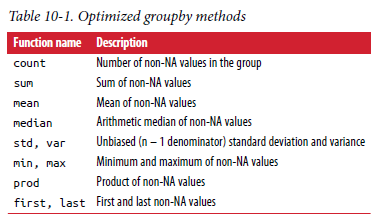

In [43]:
df

,key1,key2,data1,data2
0,a,one,-0.520734,1.578359
1,a,two,0.977059,1.166925
2,b,one,0.537765,1.290219
3,b,two,-0.650597,0.236575
4,a,one,-0.287751,-0.655521


In [44]:
grouped_ = df.groupby('key1')
grouped_.sum()

,data1,data2
key1,,
a,0.168573,2.089763
b,-0.112833,1.526794


In [45]:
grouped_['data1'].quantile(0.9)

key1
a    0.724097
b    0.418928
Name: data1, dtype: float64

In [46]:
def peak(arr):
    return arr.max()-arr.min()


In [47]:
grouped_.agg(peak)

,data1,data2
key1,,
a,1.497794,2.233879
b,1.188362,1.053644


In [48]:
grouped_.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0  0.056191  0.805958 -0.520734 -0.404243 -0.287751  0.344654   
b      2.0 -0.056416  0.840299 -0.650597 -0.353507 -0.056416  0.240674   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     0.977059   3.0  0.696588  1.188893 -0.655521  0.255702  1.166925   
b     0.537765   2.0  0.763397  0.745039  0.236575  0.499986  0.763397   

                          
           75%       max  
key1                      
a     1.372642  1.578359  
b     1.026808  1.290219

## General split-apply-combine
The most general-purpose GroupBy method is apply, which is the subject of the rest of this section. As illustration below, apply splits the object being manipulated into pieces, invokes the passed function on each piece, and then attempts to concatenate
the pieces together.
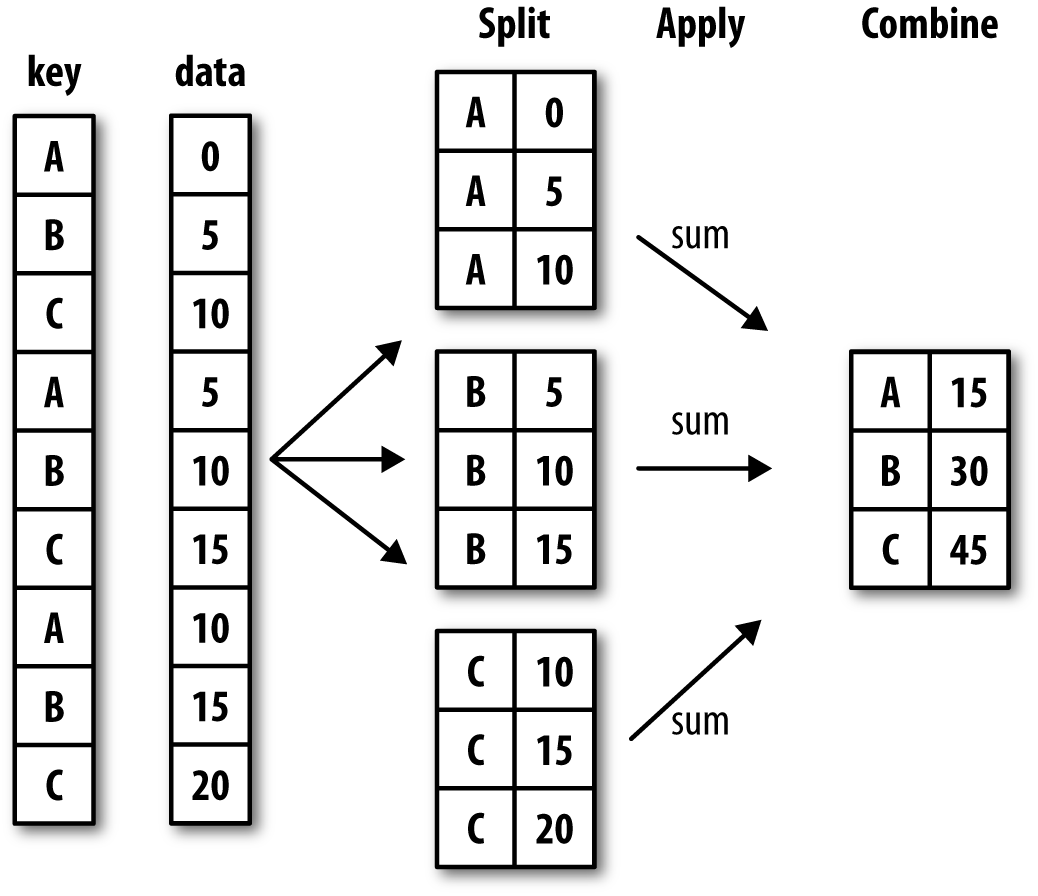

## Quantile and Bucket Analysis
As you may recall from our previous session, pandas has some tools, in particular cut and qcut,for slicing data up into buckets with bins of your choosing or by sample quantiles. Combining these functions with groupby makes it convenient to perform bucket or quantile analysis on a dataset. Consider a simple random dataset and an equal-length bucket categorization using cut

In [49]:
frame = pd.DataFrame({'data1': np.random.randn(1000),'data2': np.random.randn(1000)})


In [50]:
quartiles = pd.cut(frame.data1, 4)

In [51]:
quartiles[:10]

0     (-0.342, 1.356]
1    (-2.039, -0.342]
2     (-0.342, 1.356]
3    (-2.039, -0.342]
4    (-2.039, -0.342]
5    (-2.039, -0.342]
6    (-2.039, -0.342]
7    (-3.744, -2.039]
8     (-0.342, 1.356]
9    (-2.039, -0.342]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-3.744, -2.039] < (-2.039, -0.342] < (-0.342, 1.356] < (1.356, 3.054]]

In [52]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

In [53]:
grouped = frame.data2.groupby(quartiles)

In [54]:
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
"(-3.744, -2.039]",-2.095359,1.907676,17.0,-0.009919
"(-2.039, -0.342]",-2.660834,2.637546,351.0,0.002733
"(-0.342, 1.356]",-2.891359,3.500676,543.0,-0.023300
"(1.356, 3.054]",-2.732496,2.012994,89.0,-0.141354


In [55]:
# Return quantile numbers
grouping = pd.qcut(frame.data1, 10, labels=False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
0,-2.506167,2.511235,100.0,0.041676
1,-2.660834,2.637546,100.0,-0.067192
2,-2.630556,2.047469,100.0,-0.045056
3,-2.147442,2.458116,100.0,0.007476
4,-2.166569,2.492087,100.0,0.016249
5,-2.243286,2.707657,100.0,-0.049416
6,-2.388315,3.500676,100.0,0.015416
7,-2.891359,2.675675,100.0,-0.058880
8,-2.649416,2.487131,100.0,0.095530


In [56]:
# Filling Missing Values with Group-Specific Values

a = pd.Series(np.random.randn(6))

In [57]:
a[::2] = np.nan

In [58]:
a

0         NaN
1   -0.520044
2         NaN
3   -0.503398
4         NaN
5   -1.031712
dtype: float64

In [59]:
a.fillna(a.mean()) # Filling missing value with mean

0   -0.685051
1   -0.520044
2   -0.685051
3   -0.503398
4   -0.685051
5   -1.031712
dtype: float64

In [60]:
states = ['Ohio', 'New York', 'Vermont', 'Florida','Oregon', 'Nevada', 'California', 'Idaho']

In [61]:
group_key = ['East'] * 4 + ['West'] * 4
group_key

['East', 'East', 'East', 'East', 'West', 'West', 'West', 'West']

In [62]:
data = pd.Series(np.random.randn(8), index=states)

In [63]:
data

Ohio          0.435012
New York      0.642040
Vermont       0.697823
Florida      -0.501232
Oregon       -0.486758
Nevada        0.472874
California   -1.634806
Idaho         2.633732
dtype: float64

In [64]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan

In [65]:
data

Ohio          0.435012
New York      0.642040
Vermont            NaN
Florida      -0.501232
Oregon       -0.486758
Nevada             NaN
California   -1.634806
Idaho              NaN
dtype: float64

In [66]:
data.groupby(group_key).mean()

East    0.191940
West   -1.060782
dtype: float64

In [67]:
fill_mean = lambda g: g.fillna(g.mean())

In [68]:
data.groupby(group_key).apply(fill_mean)

Ohio          0.435012
New York      0.642040
Vermont       0.191940
Florida      -0.501232
Oregon       -0.486758
Nevada       -1.060782
California   -1.634806
Idaho        -1.060782
dtype: float64

In [69]:
# For predefined value 
fill_values = {'East': 0.5, 'West': -1}

In [70]:
fill_func = lambda g: g.fillna(fill_values[g.name])

In [71]:
data.groupby(group_key).apply(fill_func)

Ohio          0.435012
New York      0.642040
Vermont       0.500000
Florida      -0.501232
Oregon       -0.486758
Nevada       -1.000000
California   -1.634806
Idaho        -1.000000
dtype: float64

## Random Sampling and Permutation
Suppose you wanted to draw a random sample (with or without replacement) from a large dataset for Monte Carlo simulation purposes or some other application. There are a number of ways to perform the “draws”; here we use the sample method for Series.

In [72]:
# Hearts, Spades, Clubs, Diamonds
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)
deck = pd.Series(card_val, index=cards)

In [73]:
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [74]:
def draw(decl, n =5):
    return deck.sample(n)

In [75]:
# Let us draw a random card
draw(deck)

6D     6
9H     9
7D     7
8C     8
QD    10
dtype: int64

Suppose you wanted two random cards from each suit. Because the suit is the last
character of each card name, we can group based on this and use apply

In [76]:
get_suit = lambda card: card[-1] # last letter is suit

In [77]:
deck.groupby(get_suit).apply(draw, n=2)

C  AC      1
   5S      5
D  2S      2
   JD     10
H  KC     10
   10D    10
S  4S      4
   9C      9
dtype: int64

In [78]:
# Or by
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

10C    10
AS      1
QD     10
7H      7
10D    10
7S      7
JH     10
9S      9
dtype: int64

## Group Weighted Average and Correlation
Under the split-apply-combine paradigm of groupby, operations between columns in a DataFrame or two Series, such as a group weighted average, are possible. As an example, take this dataset containing group keys, values, and some weights

In [79]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a','b', 'b', 'b', 'b'],'data': np.random.randn(8),'weights': np.random.rand(8)})

In [80]:
df

,category,data,weights
0,a,1.663636,0.811304
1,a,-0.269267,0.291993
2,a,0.255810,0.978334
3,a,-1.673835,0.503988
4,b,0.138321,0.384411
5,b,0.102283,0.698311
6,b,0.026247,0.295451
7,b,-0.572318,0.074701


In [81]:
grouped = df.groupby('category')

In [82]:
grouped.sum()

,data,weights
category,,
a,-0.023656,2.585619
b,-0.305467,1.452875


In [83]:
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])

In [84]:
grouped.apply(get_wavg)

category
a    0.262129
b    0.061670
dtype: float64

## Group-Wise Linear Regression

In [85]:
import statsmodels.api as sm
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params